In [1]:
#priyanshu jha
#cse21165

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

print("Imports successfull")

Imports successfull


In [2]:
df = pd.read_excel('dataset.xlsx')
df.head(14)

,age,income,student,credit_rating,buys_computer
0,<=30,hight,no,fair,no
1,<=30,hight,no,excellent,no
2,31..40,hight,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31..40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['age'] = label_encoder.fit_transform(df['age'])
df['income'] = label_encoder.fit_transform(df['income'])
df['student'] = label_encoder.fit_transform(df['student'])
df['credit_rating'] = label_encoder.fit_transform(df['credit_rating'])
df['buys_computer'] = label_encoder.fit_transform(df['buys_computer'])

In [4]:
df

,age,income,student,credit_rating,buys_computer
0,2,0,0,1,0
1,2,0,0,0,0
2,0,0,0,1,1
3,3,2,0,1,1
4,3,1,1,1,1
5,3,1,1,0,0
6,0,1,1,0,1
7,2,2,0,1,0
8,2,1,1,1,1
9,3,2,1,1,1


In [5]:
# Columns selection
Feature_cols = ['age','income','student','credit_rating']
X = df[Feature_cols]
y = df['buys_computer']


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
X_train

,age,income,student,credit_rating
4,3,1,1,1
1,2,0,0,0
12,1,0,1,1
0,2,0,0,1
13,3,2,0,0
9,3,2,1,1
8,2,1,1,1
11,0,2,0,0
5,3,1,1,0


In [8]:
# A2 Building a decision tree model 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_train,y_train)
depth = clf.get_depth()
print("Training set accuracy: ",score)
print("Tree depth           : ",depth) 

Training set accuracy:  1.0
Tree depth           :  2


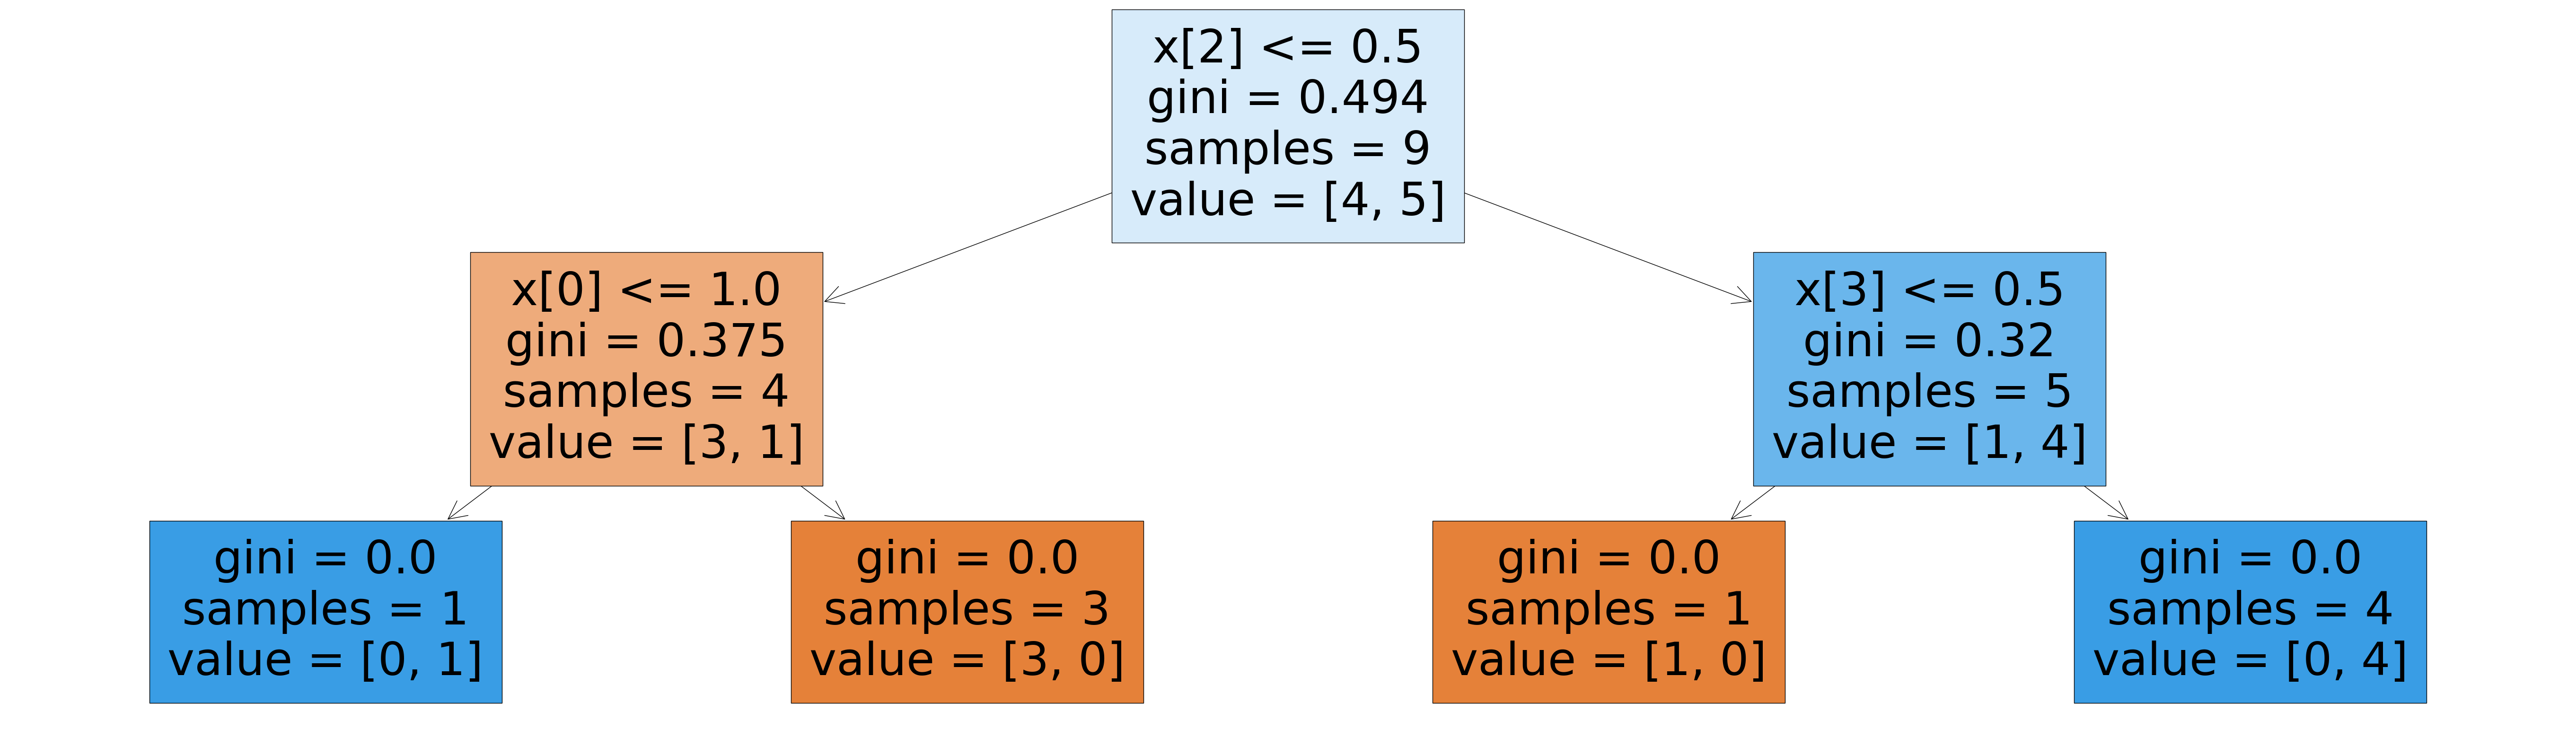

In [9]:
# A3 Visualising the constructed tree model
from sklearn import tree
plt.figure(figsize=(70,20))
plot_tree(clf, filled=True)
plt.show()

In [10]:
df2 = pd.read_csv('swiggy.csv')
df2.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [11]:
Empty = df2.isnull().sum()
Empty

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [12]:
# Taking only required features for model
df3 = df2[['ID','Area','City','Restaurant','Price','Avg ratings']]
df3.head()

,ID,Area,City,Restaurant,Price,Avg ratings
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0


In [13]:

# Define the rating ranges and corresponding 'Popular' values
rating_ranges = [(2.0, 2.4, 'Very Unsatisfied'),
                 (2.5, 3.0, 'Unsatisfied'),
                 (3.1, 3.5, 'Neutral'),
                 (3.6, 4.0, 'Satisfied'),
                 (4.1, 4.5, 'Very Satisfied'),
                 (4.6, 5.0, 'Amazing')]

# Create a function to assign 'Popular' values based on the rating
def assign_popularity(rating):
    for r_min, r_max, popular_value in rating_ranges:
        if r_min <= rating <= r_max:
            return popular_value 
    return None  # Default value if no range matches

# Apply the function to create the 'Popular' column
# df['Service'] = None
df3['Service'] = df3['Avg ratings'].apply(assign_popularity)

# Print the resulting DataFrame
print(df3)


          ID                    Area       City                Restaurant  \
0        211             Koramangala  Bangalore               Tandoor Hut   
1        221             Koramangala  Bangalore             Tunday Kababi   
2        246               Jogupalya  Bangalore                   Kim Lee   
3        248             Indiranagar  Bangalore         New Punjabi Hotel   
4        249             Indiranagar  Bangalore                       Nh8   
...      ...                     ...        ...                       ...   
8675  464626  Panjarapole Cross Road  Ahmedabad                Malt Pizza   
8676  465835                  Rohini      Delhi  Jay Mata Ji Home Kitchen   
8677  465872                  Rohini      Delhi      Chinese Kitchen King   
8678  465990                  Rohini      Delhi    Shree Ram Paratha Wala   
8679  466488             Navrangpura  Ahmedabad              Sassy Street   

      Price  Avg ratings         Service  
0     300.0          4.4  Very S

C:\Users\DELL\AppData\Local\Temp\ipykernel_11932\3591366157.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Service'] = df3['Avg ratings'].apply(assign_popularity)


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           8680 non-null   int64  
 1   Area         8680 non-null   object 
 2   City         8680 non-null   object 
 3   Restaurant   8680 non-null   object 
 4   Price        8680 non-null   float64
 5   Avg ratings  8680 non-null   float64
 6   Service      8680 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 474.8+ KB


In [15]:
# Applying label encoding on the features of object datatype
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df3['Area'] = label_encoder.fit_transform(df3['Area'])
df3['City'] = label_encoder.fit_transform(df3['City'])
df3['Restaurant'] = label_encoder.fit_transform(df3['Restaurant'])
df3['Service'] = label_encoder.fit_transform(df3['Service'])


C:\Users\DELL\AppData\Local\Temp\ipykernel_11932\2480115778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Area'] = label_encoder.fit_transform(df3['Area'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_11932\2480115778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['City'] = label_encoder.fit_transform(df3['City'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_11932\2480115778.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [16]:
# Selecting feature column from dataset
Ft_column = df3[['Area','City','Restaurant','Price','Avg ratings']]
Label = df3['Service']
X = Ft_column
y = Label

In [17]:
# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7)

In [18]:
# Building the decision tree model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_train,y_train)
depth = clf.get_depth()
print("Training set accuracy: ",score)
print("Tree depth           : ",depth) 

Training set accuracy:  1.0
Tree depth           :  3


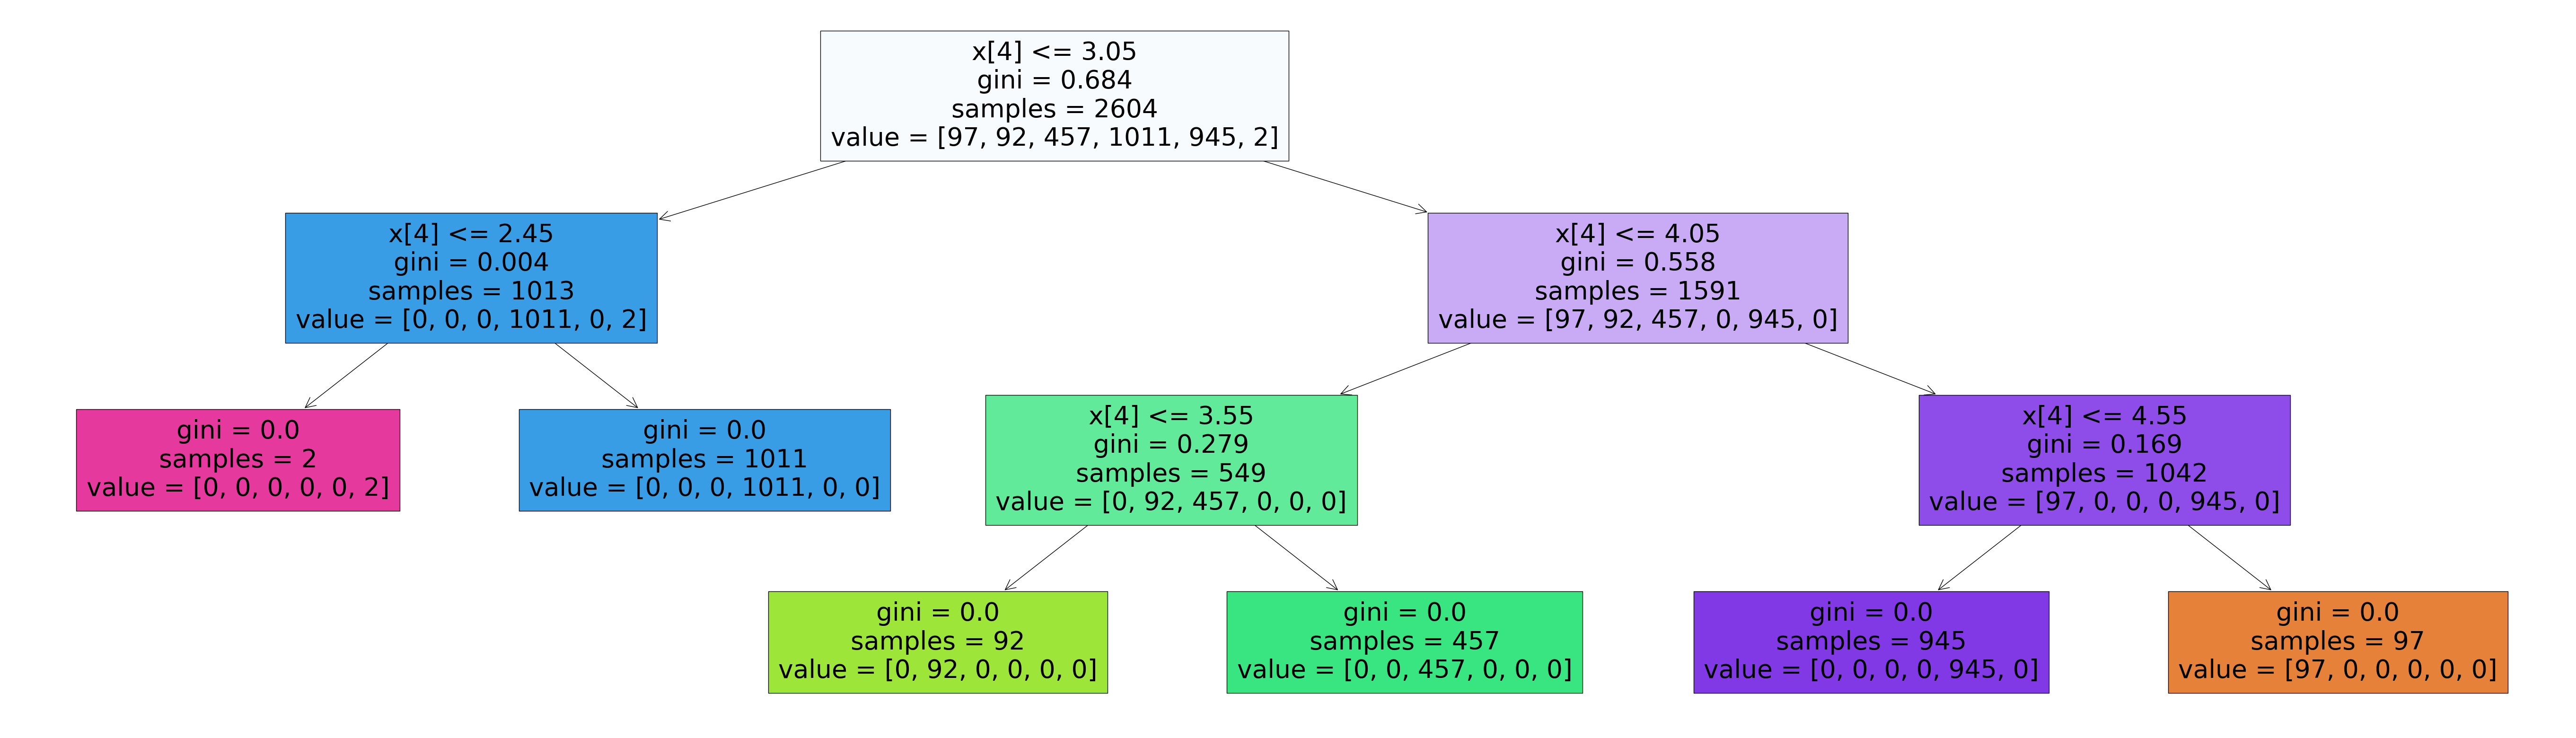

In [19]:
plt.figure(figsize=(70,20))
plot_tree(clf, filled=True)
plt.show()

In [20]:
# A5  Impose a max_depth constraint on the tree construction.
# Construct the tree again and check the accuracies. Visualize the tree constructed with max_depth constraint.
clf1 = DecisionTreeClassifier(max_depth=5)
clf1 = clf1.fit(X_train,y_train)
y_pred1 = clf1.predict(X_test)
score = clf1.score(X_train,y_train)
depth = clf1.get_depth()
print("Training set accuracy: ",score)
print("Tree depth           : ",depth) 

Training set accuracy:  1.0
Tree depth           :  3


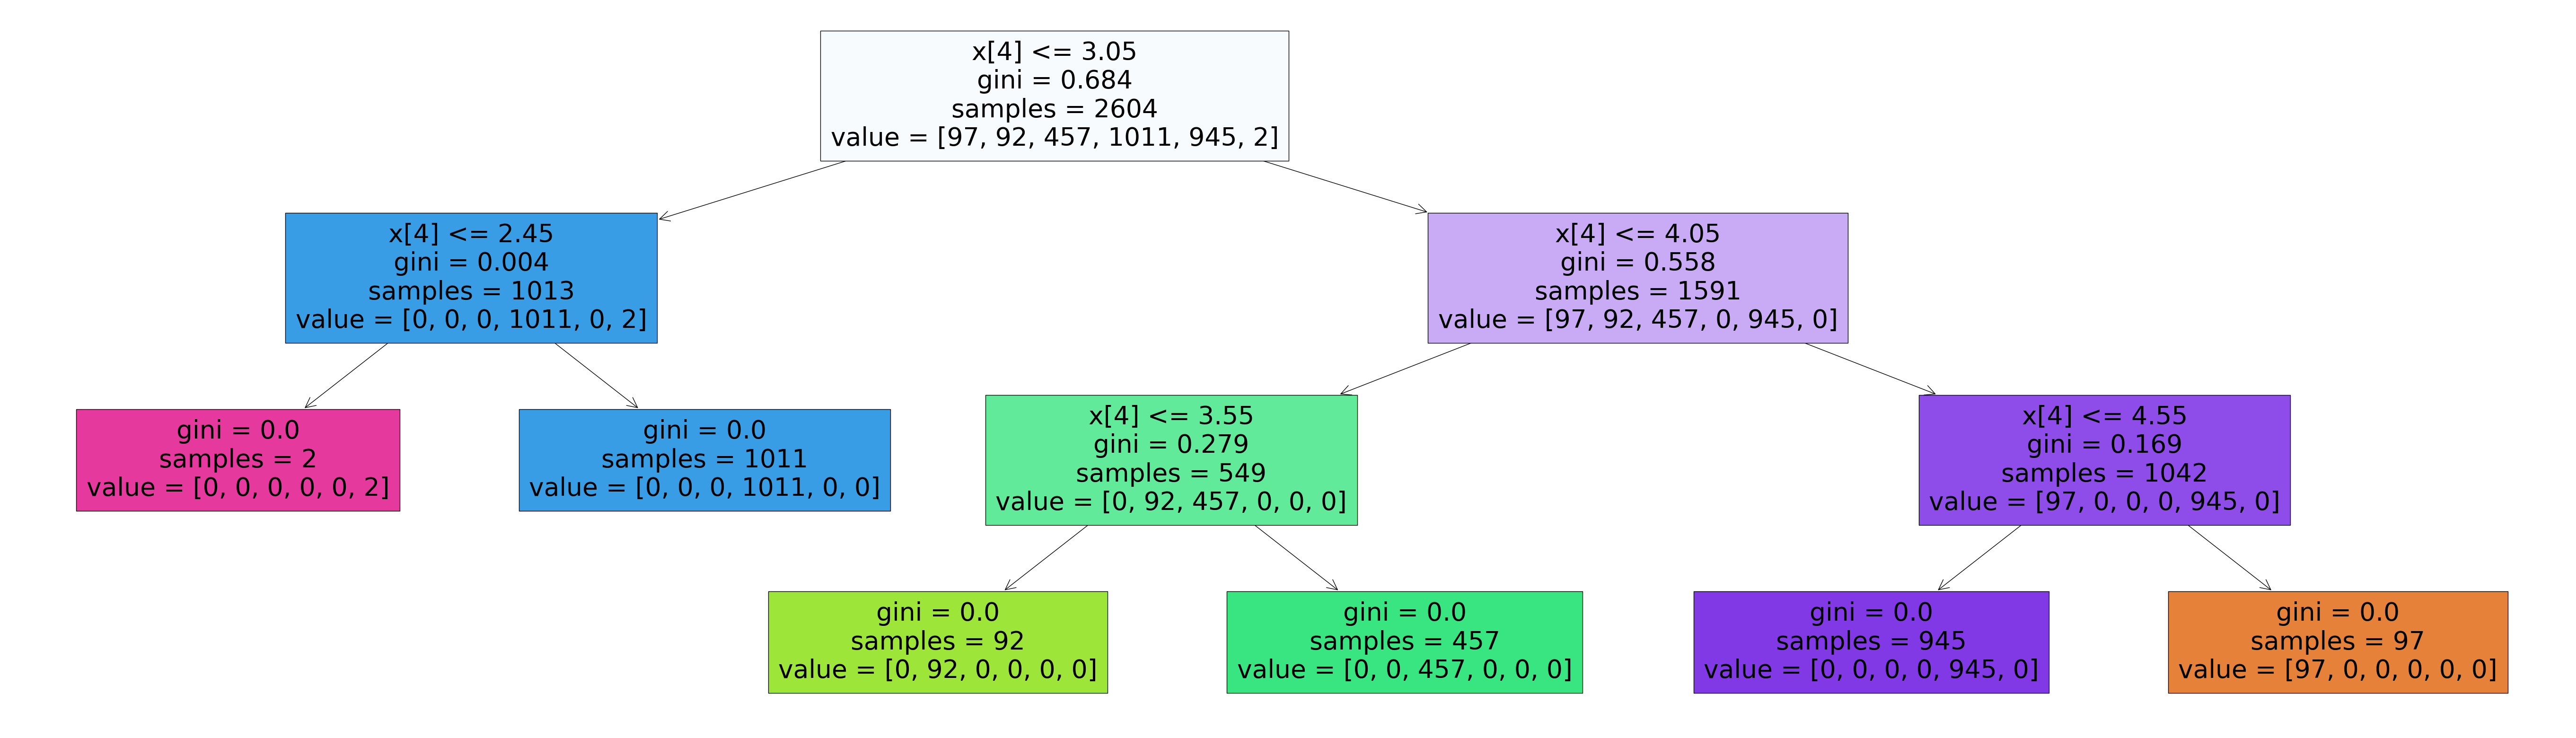

In [21]:
plt.figure(figsize=(70,20))
plot_tree(clf1, filled=True)
plt.show()

In [22]:
# A6 Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study the model & graph. 
# Find the differences between the default criterion and entropy criterion. Refer code below for criterion.
clf2 = DecisionTreeClassifier(criterion="entropy")
clf2 = clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
score = clf2.score(X_train,y_train)
depth = clf2.get_depth()
print("Training set accuracy: ",score)
print("Tree depth           : ",depth) 

Training set accuracy:  1.0
Tree depth           :  3


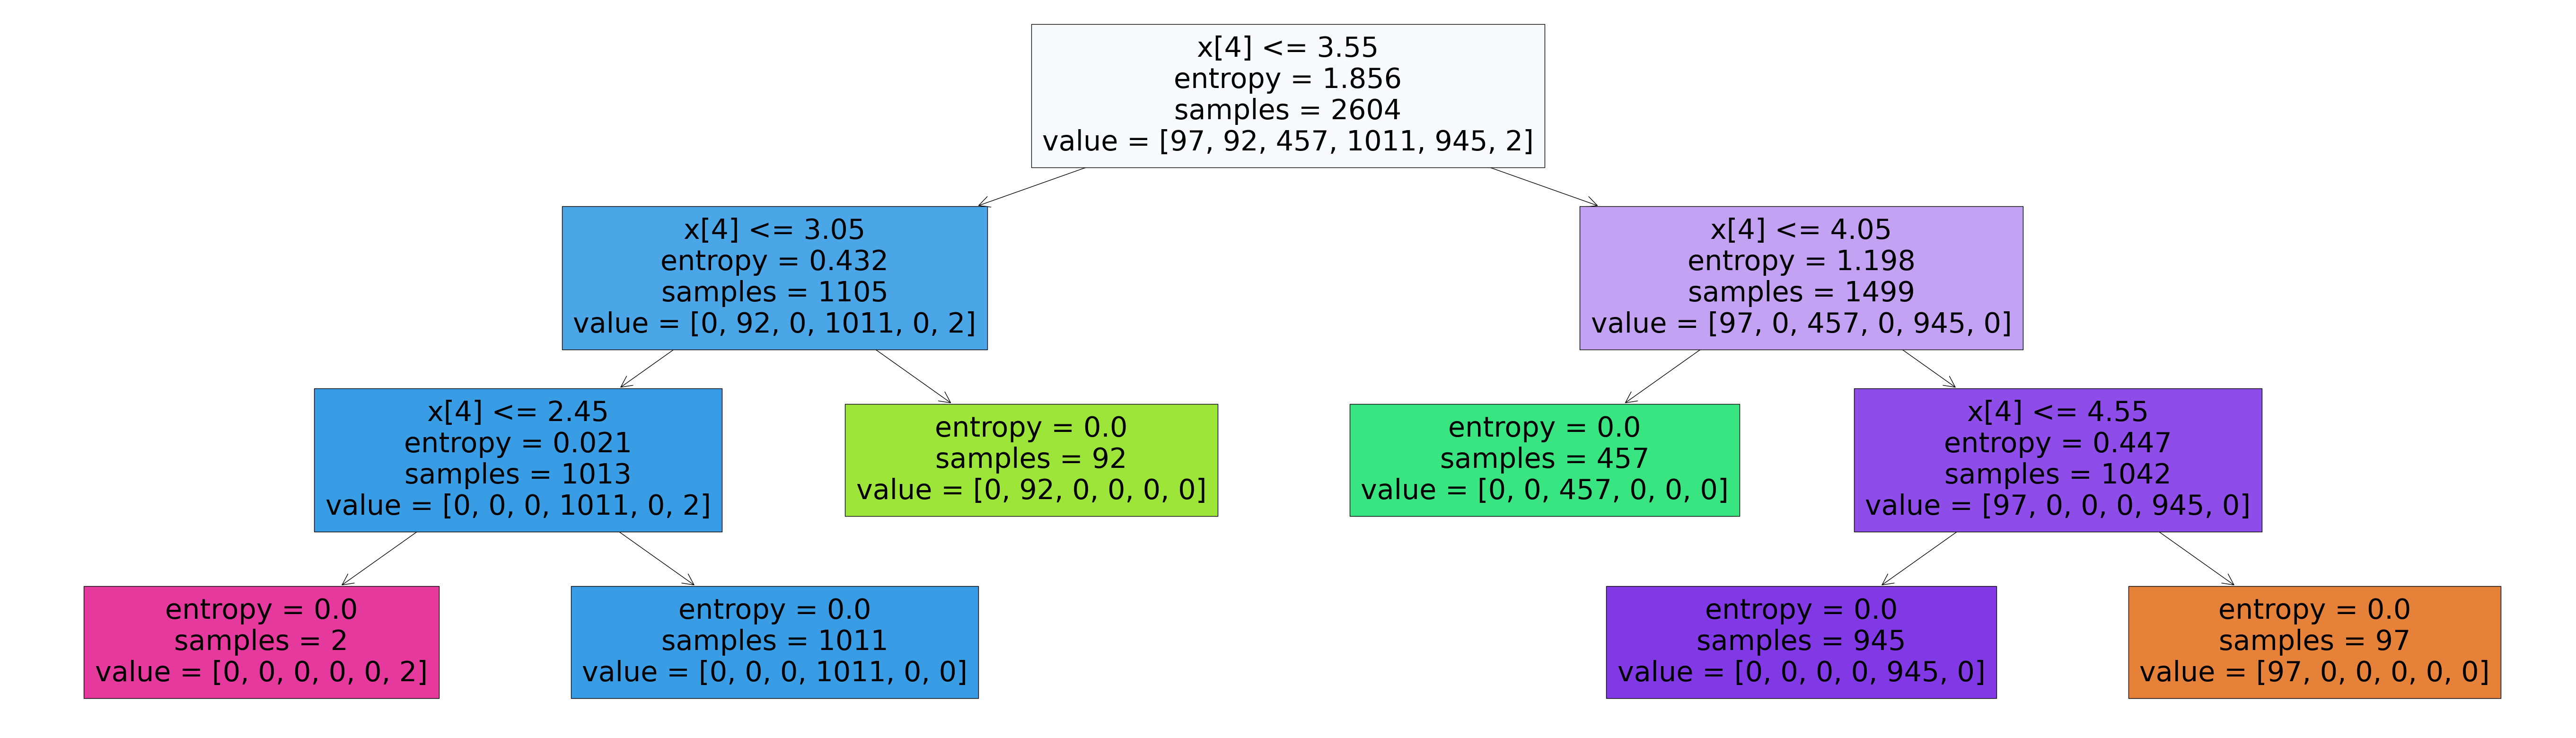

In [23]:
plt.figure(figsize=(70,20))
plot_tree(clf2, filled=True)
plt.show()

In [24]:
# A7. Construct arandom forest classifier on your project data. Find the differences between the decision tree
# & random forest classifiers with the help of the performance metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
# Splitting dataset into train and test set
X = Ft_column # Feature columns used earlier
y = df3['Service'] #Target variable

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7, random_state=42)

In [26]:
# Creating a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)

# Training the model on Random Foresst Classifier
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [27]:
# Makig prediction usig Random Forest Classifier
y1_pred = rfc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test,y1_pred)
print("Accuracy of Random Forest Classifier: ",accuracy)


Accuracy of Random Forest Classifier:  0.999012508229098


In [28]:
# Printing classfication report for detailed metrices
print("Classification report of metrices\n")
print(classification_report(y_test,y1_pred))

Classification report of metrices

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       225
           1       1.00      1.00      1.00       203
           2       1.00      1.00      1.00      1089
           3       1.00      1.00      1.00      2286
           4       1.00      1.00      1.00      2267
           5       0.00      0.00      0.00         6

    accuracy                           1.00      6076
   macro avg       0.83      0.83      0.83      6076
weighted avg       1.00      1.00      1.00      6076



C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: U

In [29]:
# Creating a confusion matrix
cm = confusion_matrix(y_test,y1_pred)
print("Confusion matrix")
print(cm)

Confusion matrix
[[ 225    0    0    0    0    0]
 [   0  203    0    0    0    0]
 [   0    0 1089    0    0    0]
 [   0    0    0 2286    0    0]
 [   0    0    0    0 2267    0]
 [   0    0    0    6    0    0]]
